In [25]:
import yfinance as yf
df = yf.download("^NSEI",start="1990-01-01", end="2025-11-13")
df.head()

C:\Users\ricky\AppData\Local\Temp\ipykernel_2532\1593849898.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download("^NSEI",start="1990-01-01", end="2025-11-13")
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,^NSEI,^NSEI,^NSEI,^NSEI,^NSEI
Date,,,,,
2007-09-17,4494.649902,4549.049805,4482.850098,4518.450195,0
2007-09-18,4546.200195,4551.799805,4481.549805,4494.100098,0
2007-09-19,4732.350098,4739.000000,4550.250000,4550.250000,0
2007-09-20,4747.549805,4760.850098,4721.149902,4734.850098,0
2007-09-21,4837.549805,4855.700195,4733.700195,4752.950195,0


In [18]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

df = df[['Open', 'High', 'Low', 'Close', 'Volume']]

df.dropna(inplace=True)
scaler = MinMaxScaler()
scaled = scaler.fit_transform(df)

In [19]:
X , y = [], []
lookback = 60

for i in range(lookback , len(scaled)):
    X.append(scaled[i-lookback:i])
    y.append(scaled[i,3])

X, y = np.array(X), np.array(y)

In [20]:
split = int(len(X) * 0.8)

X_train,X_test = X[:split],X[split:]
y_train,y_test = y[:split],y[split:]

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

model =  Sequential(
    [
        LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
        Dropout(0.2),
        LSTM(50, return_sequences=False),
        Dropout(0.2),
        Dense(25),
        Dense(1)
    ]
)
model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

C:\Users\ricky\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 60, 50)         │        11,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 60, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 25)             │         1,275 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 32,701 (127.74 KB)

 Trainable params: 32,701 (127.74 KB)

 Non-trainable params: 0 (0.00 B)

In [26]:
history = model.fit(
    X_train,y_train,
    epochs=20,
    batch_size=32,
    validation_split=0.1
)

Epoch 1/20
99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 1.5004e-04 - val_loss: 5.0108e-04
Epoch 2/20
99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 1.5503e-04 - val_loss: 1.7058e-04
Epoch 3/20
99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 1.4020e-04 - val_loss: 3.6468e-04
Epoch 4/20
99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 1.3142e-04 - val_loss: 3.5337e-04
Epoch 5/20
99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 1.3452e-04 - val_loss: 2.7962e-04
Epoch 6/20
99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 1.3995e-04 - val_loss: 4.0317e-04
Epoch 7/20
99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 1.4550e-04 - val_loss: 1.6094e-04
Epoch 8/20
99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 1.3369e-04 - val_loss: 4.4288e-04
Epoch 9/20
99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 1.4522e-04 - val_loss: 2.6947e-04
Epoch 10/20
99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 1.3689e-04 - val_loss: 2.5249e-04
Epoch 11/20
99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 1.3596e-0

28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step


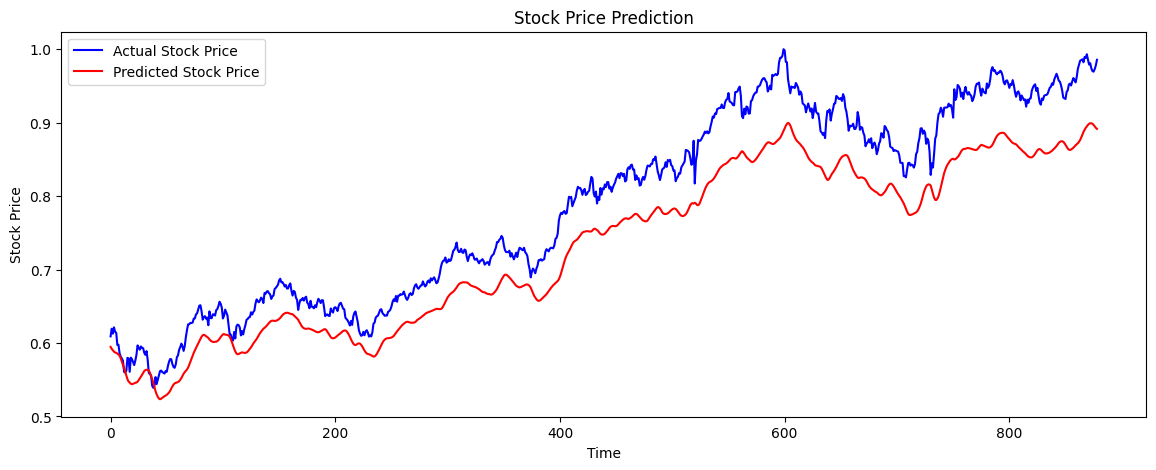

In [23]:
import matplotlib.pyplot as plt
pred = model.predict(X_test)

plt.figure(figsize=(14,5))
plt.plot(y_test, color='blue', label='Actual Stock Price')
plt.plot(pred, color='red', label='Predicted Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [24]:
last_60 = scaled[-60:]
last_60 = last_60.reshape(1, 60, 5)

tomorrow = model.predict(last_60)
predicted_price = tomorrow[0][0]

print("Predicted Next Day NIFTY Close (scaled):", predicted_price)

# Get the last actual close price (scaled)
last_close_scaled = scaled[-1][3]

# Compare and print direction
if predicted_price > last_close_scaled:
    print("👉 Prediction: The NIFTY 50 market will go UP tomorrow.")
else:
    print("👉 Prediction: The NIFTY 50 market will go DOWN tomorrow.")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Predicted Next Day NIFTY Close (scaled): 0.8912271
👉 Prediction: The NIFTY 50 market will go DOWN tomorrow.
